LeverAUC & HLAUC = 62%acc and AUC-ROC 57
--- LeverZmax & HLZmax = 64%acc and AUC-ROC 66


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [125]:
behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')

# Assuming behav is your DataFrame and it's already imported
# Replace all occurrences of 3 with 2 in the 'NextLever' column

behav['NextLever'] = behav['NextLever'].replace(3, 2)
removeOmits = behav[behav['NextLever'] != 0]
ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.tail

<bound method NDFrame.tail of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          2     1   2.401602  -1.003824   
21    16  230123      22      3          2     1   2.926855  -1.217437   
22    16  230123      23      3          2     1   1.696856  -1.406294   
23    16  230123      24      3          2     1   1.724995  -1.203465   
24    16  230123      25      3          2     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1668  32  230407      46      2          2     4   2.178934  -2.011815   
1669  32  230407      47      2          1     2   1.441027  -1.541796   
1671  32  230407      50      1          2     0   0.368848  -0.990443   
1672  32  230407      51      3          1     3   3.332265  -1.602789   
1674  32  230407      55      1          2     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

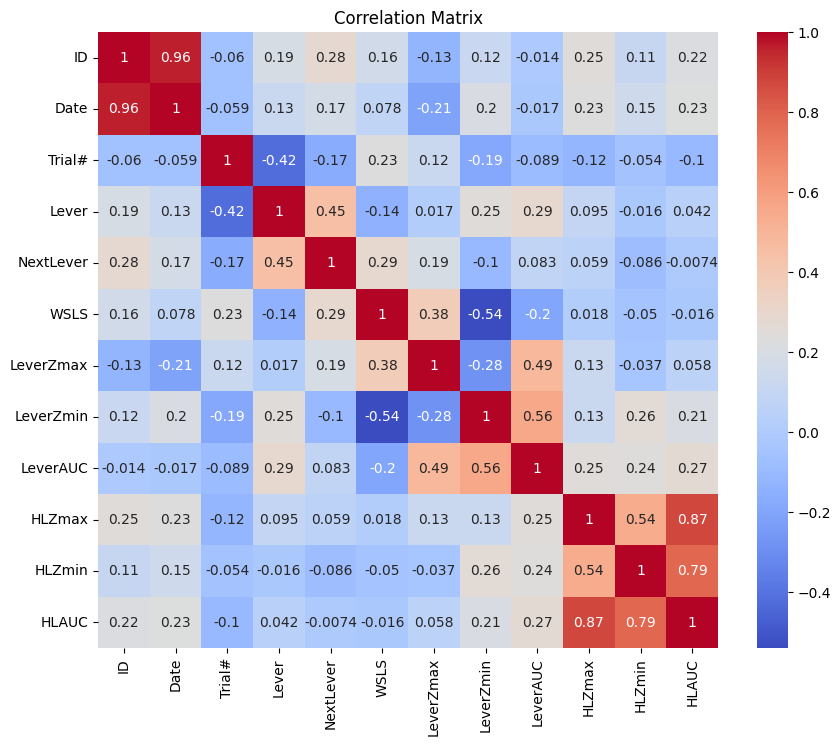

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [115]:
# Example dataset
# Replace this with your actual dataset
feature_names = ['LeverAUC']  # Assuming X is a DataFrame

X = df[feature_names]  # Predictor variables
y = df['NextLever']  # Target variable with three categories

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Now, X_train_res and y_train_res are the resampled data
# Create a multinomial logistic regression model
# 'multinomial' specifies that the target variable has more than two classes
# 'lbfgs' is an optimization algorithm suitable for multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced',max_iter=1000)

# Fit the model on the training data
model.fit(X_train_res, y_train_res)

# Predict on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.18      0.62      0.28        32
           2       0.90      0.55      0.68       205

    accuracy                           0.56       237
   macro avg       0.54      0.59      0.48       237
weighted avg       0.81      0.56      0.63       237

Confusion Matrix:
 [[ 20  12]
 [ 93 112]]


In [116]:
# Extracting the coefficients
coefficients = model.coef_

# Displaying the coefficients
print("Coefficients matrix:\n", coefficients)


for class_index in range(coefficients.shape[0]):
    print(f"Class {class_index}:")
    for feature_index in range(coefficients.shape[1]):
        print(f"  {feature_names[feature_index]}: {coefficients[class_index, feature_index]}")
    print()


Coefficients matrix:
 [[0.10395574]]
Class 0:
  LeverAUC: 0.10395574416299416



In [117]:
import statsmodels.api as sm

# Fit logistic regression using statsmodels for detailed statistics
# Add a constant to the input features
X_stat = sm.add_constant(X_train)
model_stat = sm.MNLogit(y_train, X_stat)
result_stat = model_stat.fit()

# Print summary for detailed statistics
print(result_stat.summary())


Optimization terminated successfully.
         Current function value: 0.400990
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:              NextLever   No. Observations:                  550
Model:                        MNLogit   Df Residuals:                      548
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                0.009812
Time:                        20:43:17   Log-Likelihood:                -220.54
converged:                       True   LL-Null:                       -222.73
Covariance Type:            nonrobust   LLR p-value:                   0.03655
NextLever=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8093      0.124     14.629      0.000       1.567       2.052
LeverAUC        0.0020    

In [118]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(model, X_test_scaled, y_test)

# Summarize in a DataFrame
perm_importance_df = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='importance', ascending=False)

print(perm_importance_df)


    feature  importance
0  LeverAUC    0.032068


c:\Users\Wonn\Documents\GitHub\ML-For-Beginners\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


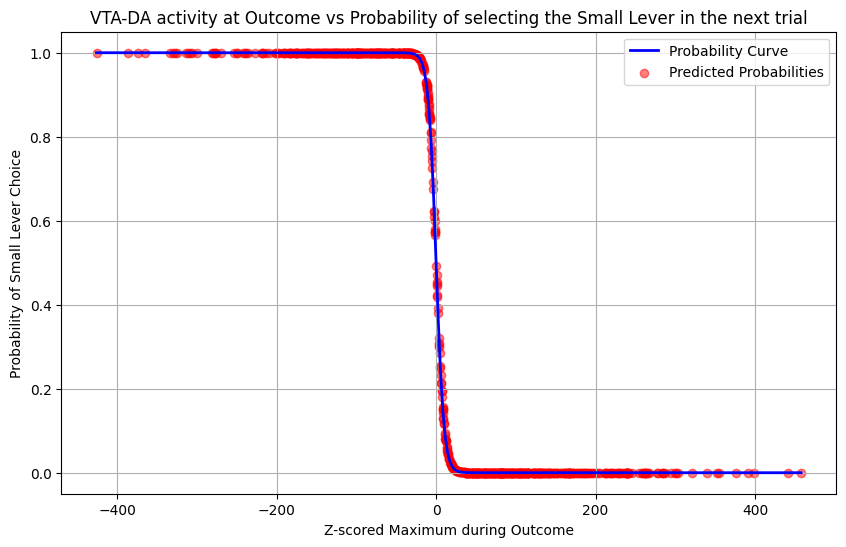

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df[feature_names]

# Calculate the mean of other features in your dataset
X_mean = df_filtered.drop('LeverAUC', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df_filtered['LeverAUC'].min(), df_filtered['LeverAUC'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 0]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df_filtered.copy()
X_data_points['LeverAUC'] = X_data_points['LeverAUC'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 0]

# Plotting the probability curve
plt.figure(figsize=(10, 6))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df_filtered['LeverAUC'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Small Lever in the next trial')
plt.xlabel('Z-scored Maximum during Outcome')
plt.ylabel('Probability of Small Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\Wonn\Documents\GitHub\ML-For-Beginners\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


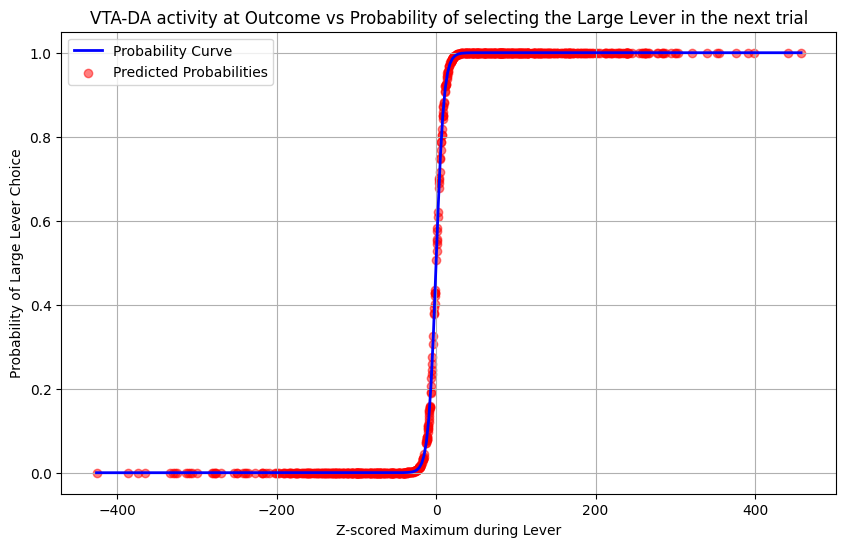

In [120]:

# Calculate the mean of other features in your dataset
X_mean = df_filtered.drop('LeverAUC', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df_filtered['LeverAUC'].min(), df_filtered['LeverAUC'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 1]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df_filtered.copy()
X_data_points['LeverAUC'] = X_data_points['LeverAUC'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 1]

# Plotting the probability curve
plt.figure(figsize=(10, 6))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df_filtered['LeverAUC'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Large Lever in the next trial')
plt.xlabel('Z-scored Maximum during Lever')
plt.ylabel('Probability of Large Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

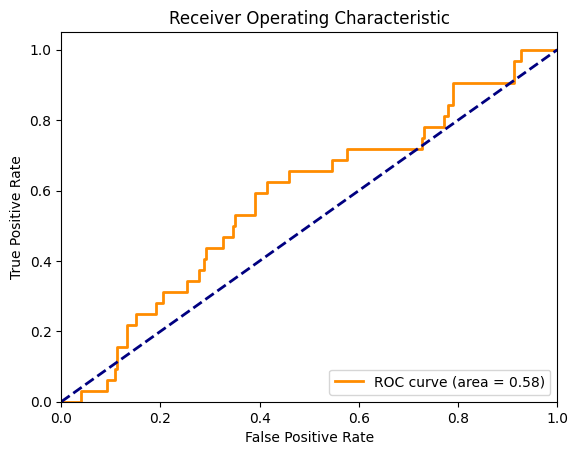

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_model is your trained classifier
# and X_test, y_test are your test dataset and labels

# Get predicted probabilities for the positive class
y_score = model.predict_proba(X_test_scaled)[:, 0]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)  # Adjust pos_label if necessary
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [122]:
with29 = behav[behav['Lever'] == 1].mean()
without29 = df[df['Lever'] == 1].mean()
print(with29, without29)

ID               20.125000
Date         230197.414062
Trial#           44.664062
Lever             1.000000
NextLever         1.695312
WSLS              0.000000
LeverZmax         1.373147
LeverZmin        -1.695498
LeverAUC        -16.353191
HLZmax            2.194823
HLZmin           -1.260528
HLAUC            45.364922
dtype: float64 ID               19.063636
Date         230178.654545
Trial#           44.245455
Lever             1.000000
NextLever         1.381818
WSLS              0.000000
LeverZmax         1.303410
LeverZmin        -1.747019
LeverAUC        -22.034998
HLZmax            2.134486
HLZmin           -1.283321
HLAUC            42.258055
dtype: float64


In [123]:
with29 = behav[behav['Lever'] == 2].mean()
without29 = df[df['Lever'] == 2].mean()
print(with29, without29)

ID               25.180851
Date         230275.161702
Trial#           44.300000
Lever             2.000000
NextLever         2.170213
WSLS              3.531915
LeverZmax         4.058067
LeverZmin        -4.398419
LeverAUC        -16.051990
HLZmax            2.432188
HLZmin           -1.359720
HLAUC            48.407449
dtype: float64 ID               24.196203
Date         230239.281646
Trial#           43.094937
Lever             2.000000
NextLever         1.920886
WSLS              3.841772
LeverZmax         4.245738
LeverZmin        -5.041719
LeverAUC        -28.209098
HLZmax            2.520569
HLZmin           -1.368804
HLAUC            50.770962
dtype: float64


In [124]:
with29 = behav[behav['Lever'] == 3].mean()
without29 = df[df['Lever'] == 3].mean()
print(with29, without29)

ID               24.712697
Date         230269.250232
Trial#           21.267841
Lever             3.000000
NextLever         2.235403
WSLS              1.041705
LeverZmax         2.329203
LeverZmin        -1.453667
LeverAUC         42.772658
HLZmax            2.651855
HLZmin           -1.366573
HLAUC            59.918273
dtype: float64 ID               24.022161
Date         230242.880886
Trial#           33.141274
Lever             3.000000
NextLever         1.955679
WSLS              1.088643
LeverZmax         2.616788
LeverZmin        -1.363681
LeverAUC         59.211838
HLZmax            2.621823
HLZmin           -1.354715
HLAUC            55.768649
dtype: float64
